In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [ ]:
#0 import moudules
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
#1 define state
class State(TypedDict):
    # define message, type is list and adding by function that name is add_message
    messages: Annotated[list, add_messages]

In [3]:
#2 define node
from langchain_google_genai import ChatGoogleGenerativeAI

# define llm
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
) 
def chatbot(state: State):
    # Call and Return message
    return {"messages" : [llm.invoke(state["messages"])]}

In [4]:
#3 generate graph
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)


In [5]:
#4 Add graph Edge
# Add Edge that Start node to chatbot node
graph_builder.add_edge(START, "chatbot")

# add Edge on graph
graph_builder.add_edge("chatbot", END)

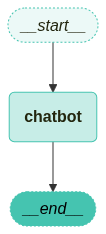

In [7]:
# Compile Graph
from langchain_teddynote.graphs import visualize_graph
graph = graph_builder.compile()

# visulaize graph
visualize_graph(graph)

In [8]:
# Execute chatbot

question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)


Assistant: 네, 서울에서 유명한 맛집 TOP 10을 추천해 드릴게요! 다양한 종류의 맛집을 고려하여 선정했습니다.

1.  **미쉐린 가이드 맛집:**

*   **가온:** 한식을 고급스럽게 재해석한 미쉐린 3스타 레스토랑입니다. 격조 높은 분위기에서 특별한 식사를 즐길 수 있습니다. (강남구)
*   **권숙수:** 전통주와 한식의 조화를 선보이는 미쉐린 2스타 레스토랑입니다. 섬세한 맛과 아름다운 플레이팅이 인상적입니다. (강남구)
*   **유 유안:** 포시즌스 호텔 서울에 위치한 광둥 요리 전문점입니다. 딤섬과 북경 오리가 특히 유명하며, 화려한 분위기에서 식사를 즐길 수 있습니다. (종로구)

2.  **줄 서서 먹는 맛집:**

*   **몽탄:** 짚불로 초벌한 돼지갈비로 유명한 곳입니다. 독특한 풍미와 푸짐한 양으로 인기가 많아 웨이팅이 필수입니다. (용산구)
*   **다운타우너:** 수제 버거 맛집으로, 다양한 종류의 버거와 감자튀김을 맛볼 수 있습니다. 특히 아보카도 버거가 인기 메뉴입니다. (용산구, 강남구 등)
*   **에머이:** 베트남 쌀국수 전문점으로, 깊고 진한 육수와 쫄깃한 면발이 특징입니다. 롤만두와 분짜도 인기 메뉴입니다. (강남구, 종로구 등)

3.  **가성비 좋은 맛집:**

*   **황생가칼국수:** 60년 전통의 칼국수 맛집입니다. 사골 육수의 깊은 맛과 푸짐한 양으로 오랫동안 사랑받고 있습니다. (종로구)
*   **이문설농탕:** 100년이 넘는 역사를 자랑하는 설렁탕 전문점입니다. 뽀얀 국물과 부드러운 고기가 일품입니다. (종로구)
*   **종로빈대떡:** 광장시장의 명물인 빈대떡 맛집입니다. 저렴한 가격에 푸짐한 빈대떡을 맛볼 수 있습니다. (종로구)

4.  **분위기 좋은 맛집:**

*   **더 키친 살바토레 쿠오모:** 이탈리아 나폴리 피자 맛집으로, 화덕에서 구워낸 정통 피자를 맛볼 수 있습니다. 아름다운 한강 뷰를 감상하며 식사를 즐길 수 있습니다. (용산구)

**참고사항:*